## Data retreival and scrubbing of Cincinnati 911 Call dataset

### About the Data

The final project aims at analyzing the Cincinnati's 911 call dataset to better understand the response rate and the top reasons contributing to the emergencies and determine whether the emergency response team is well equipped to deal with such state of emergencies.

The dataset used for this project is obtained from the City of Cincinnati's computer aided dispatch (CAD) database which contains fire incident responses including emergency medical services calls, fires, rescue incidents, and all other services handled by the fire Department. All incidents are coded according to the the classification: for EMS (emergency medical services) which includes ALS (advanced life support) and BLS (basic life support); MEDI (tasing police requests); FIRE (fire incidents) and OTHE (services provided by CFD but are not classified as a fire response).If the CFD_Incident_Type is Null it is an ALS response as the system does not register auto accidents with a CFD_Incident_Type.

This dataset contains emergency call data for last five years dating from 1/1/2015 and is updated daily. The dataset is available as a public domain which allows to freely share and use the data for any purpose and without any restrictions. License information for this dataset can be found [here](https://opendatacommons.org/licenses/pddl/1-0/)

The entire dataset contains 497,493 rows with 17 columns which can be downloaded as a CSV or CSV for Excel with TSV, RDF,RSS, XML as additional formats. You can also access this data via Socrata Open Data API (SODA) which provides programmatic access to this dataset including the ability to filter, query, and aggregate data. For futher information on how to access the dataset using the SODA API, please use the [API documentation](https://dev.socrata.com/foundry/data.cincinnati-oh.gov/vnsz-a3wp) which is an excellent resource with detailed instructions. Additionally, this notebook also covers instructions on downloading the data using the SODA API.


### Step 1 - Download the Data

Visit https://data.cincinnati-oh.gov/Safety/Cincinnati-Fire-Incidents-CAD-including-EMS-ALS-BL/vnsz-a3wp

Click on the "API" menu and copy the API endpoint as seen in the screenshot below. 

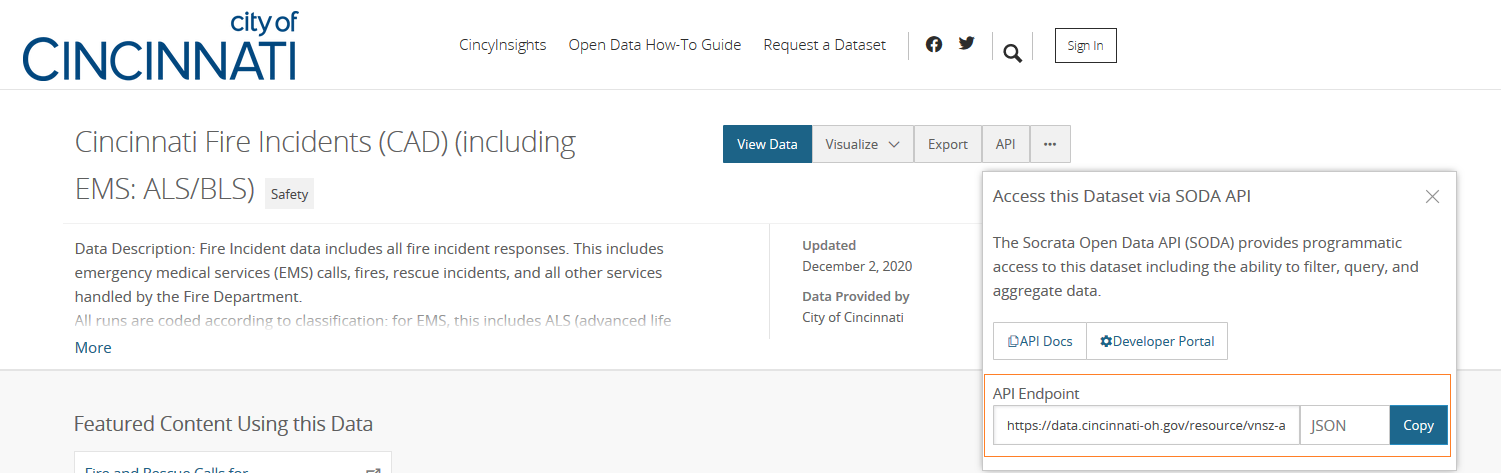

###### Let’s begin by installing and importing the necessary packages\libraries.

In [1]:
# Install sodapy
# Sodapy is a python client for the Socrata Open Data API.
!pip install sodapy

In [2]:
import warnings
import pandas as pd
from sodapy import Socrata
warnings.filterwarnings("ignore")

###### Loading the dataset from an API endpoint using sodapy

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password
client = Socrata("data.cincinnati-oh.gov", None)
# Entire records returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results_cincinnati = client.get("vnsz-a3wp", limit=497300)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results_cincinnati)

###### Now that we have downloaded the data using the API onto the dataframe, let us explore the first few rows of the dataset

In [4]:
# reading first five rows
results_df.head()

,address_x,latitude_x,longitude_x,agency,create_time_incident,disposition_text,event_number,incident_type_id,incident_type_desc,neighborhood,arrival_time_primary_unit,beat,closed_time_incident,dispatch_time_primary_unit,cfd_incident_type,cfd_incident_type_group,community_council_neighborhood
0,HAZELWOOD AV / MONTANA AV,39.1486440000896,-84.596347,CFD,2020-12-03T16:14:39.000,EMS: NO TRANSPORT,CFD201203000130,29A1,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,WESTWOOD,2020-12-03T16:15:27.000,ST35,2020-12-03T16:29:34.000,2020-12-03T16:14:57.000,BLS,TRAFFIC / TRANSPORTATION INCIDENTS,WESTWOOD
1,RIVER RD,39.0864830000897,-84.572837,CFD,2020-11-13T22:28:22.000,MEDT: MEDIC TRANSPORT,CFD201113000222,29A1,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,RIVERSIDE,2020-11-13T22:32:25.000,ST37,2020-11-13T23:15:37.000,2020-11-13T22:29:04.000,BLS,TRAFFIC / TRANSPORTATION INCIDENTS,SEDAMSVILLE
2,PRESIDENT DR,39.1534720000896,-84.560768,CFD,2020-09-01T16:45:57.000,MED: MT RESPONSE NO TRANSPORT,CFD200901000147,29A1,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,VILLAGES AT ROLL HILL,2020-09-01T16:54:08.000,ST12,2020-09-01T17:04:49.000,2020-09-01T16:50:28.000,BLS,TRAFFIC / TRANSPORTATION INCIDENTS,VILLAGES AT ROLL HILL
3,HIGHLAND AV / RIDGE RD,39.1702690000896,-84.426011,CFD,2020-04-09T09:10:59.000,MED: MT RESPONSE NO TRANSPORT,CFD200409000078,29A1,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,N/A,2020-04-09T09:18:50.000,OTHER JURIS 8,2020-04-09T09:19:15.000,2020-04-09T09:11:10.000,BLS,TRAFFIC / TRANSPORTATION INCIDENTS,N/A
4,CLIFTON AV / W MARTIN LUTHER KING JR DR,39.1350670000896,-84.519264,CFD,2020-01-10T16:18:16.000,"EMS: NO TRANSPORT,IN: INVESTIG",CFD200110000136,29A1,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,CUF,2020-01-10T16:18:47.000,ST34,2020-01-10T16:33:53.000,2020-01-10T16:18:47.000,BLS,TRAFFIC / TRANSPORTATION INCIDENTS,CORRYVILLE - HEIGHTS


### Step 2 - Scrub the Data

###### a. Checking for null values in given dataset

In [5]:
# is null value present or not?
results_df.isnull().values.any()  

True

In [6]:
# total number of null value in each column
results_df.isnull().sum()

address_x                             87
latitude_x                         23542
longitude_x                        23542
agency                                 0
create_time_incident                   0
disposition_text                    3114
event_number                           0
incident_type_id                    1577
incident_type_desc                159885
neighborhood                           0
arrival_time_primary_unit          73219
beat                                 532
closed_time_incident                4946
dispatch_time_primary_unit         46289
cfd_incident_type                  13640
cfd_incident_type_group            13649
community_council_neighborhood         0
dtype: int64

###### b. Fill in missing values

As per the CFD website, if cfd_Incident_Type is Null it is an ALS response as the system does not register auto accidents with a CFD_Incident_Type. 

In [7]:
# replacing na values in cfd_Incident_Type with ALS
results_df["cfd_incident_type"].fillna("ALS", inplace = True) 
print ("Successfully filled in the missing values for the cfd_incident_type column!!")

Successfully filled in the missing values for the cfd_incident_type column!!


### Step 3 - Data Transformation

###### a. Extracting data from existing columns into a new column

In the disposition_text column, the fire disposition codes are specified before the description. Use .apply() with a custom lambda expression to create a new column called "disposition_code" that contains this string value.

In [8]:
# filter the dataset to remove NaN or empty cells
df_new = results_df[results_df['disposition_text'].notnull()]
# Use .apply() with a custom lambda expression to get the disposition code
results_df['disposition_code'] = df_new['disposition_text'].apply(lambda disposition_text: disposition_text.split(':')[0])

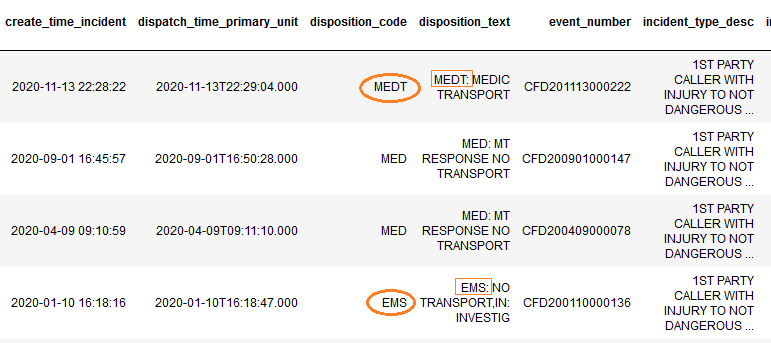

###### b. Creating columns based on the existing columns

In [9]:
# check the datatype before extracting the year, month and day from the create_time_incident column
print("Datatype of create_time_incident :", results_df['create_time_incident'].dtypes)
print("Datatype of arrival_time_primary_unit :", results_df['arrival_time_primary_unit'].dtypes)

Datatype of create_time_incident : object
Datatype of arrival_time_primary_unit : object


In [10]:
# Converting the timestamp column from object to DateTime.
results_df['create_time_incident'] = pd.to_datetime(results_df['create_time_incident'])
results_df['arrival_time_primary_unit'] = pd.to_datetime(results_df['arrival_time_primary_unit'])

In [11]:
# Creating 4 new columns called Hour, Month, Year and Day of Week based off of the create_time_incident column.
results_df['Hour'] = results_df['create_time_incident'].apply(lambda time: time.hour)
results_df['Month'] = results_df['create_time_incident'].apply(lambda time: time.month)
results_df['Year'] = results_df['create_time_incident'].apply(lambda time: time.year)
results_df['Day of Week'] = results_df['create_time_incident'].apply(lambda time: time.dayofweek)

In [12]:
# Creating a dictionary and using the .map() function with this dictionary to map the 
# actual string names to the day of the week.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
results_df['Day of Week'] = results_df['Day of Week'].map(dmap)

In [13]:
# To calculate the response rate in minutes
results_df['response_rate_minutes']= ((results_df['arrival_time_primary_unit'])-(results_df['create_time_incident'])).dt.total_seconds ()/60

In [14]:
# Categorize the call as emergency vs non-emergency based on the disposition codes 
emergency_codes  = ['EMS','EXT', 'EXTT','MED','MEDT','TRP','TRPT','AMBULANCE TRANSPORTED','AMBULANCE RESPONSE/NO TRNSPORT', \
                   'DEF', 'ENTRAPMENTS WITH TRANSPORT', 'EXTINGUISHMENT','ENTRAPMENT','EXTINGUISHMENT WITH TRANSPORT', 'MED', \
                  'MEDD', 'MEDIC TR RESP & TRANSPORTED' ,'MEDIC TR RESP- NO TRANSPORT', 'MEDT', 'NAR','NART', 'PAN', 'NC', \
                  'REASF', 'PT', 'REMOVE HAZARD', 'REMOVE HAZARD WITH TRANSPORT', 'RES','REST','RHZ', 'RHZT' ,'SBY', 'STANDBY']
results_df['call_type'] = 'Non-Emergency'
results_df.loc[results_df.disposition_code.isin(emergency_codes),'call_type']='Emergency'

In [15]:
# Create a new column "reason" based on further grouping the exisitng incident types 
ems_codes = ['ALS','BLS']
fire_codes = ['FIRE', 'OTHE']
pd_codes = ['MEDI']

# Grouping the ALS and BLS incident type as EMS
results_df.loc[results_df.cfd_incident_type.isin(ems_codes),'reason']='EMS'
# Grouping the FIRE and OTHE incident type as FIRE
results_df.loc[results_df.cfd_incident_type.isin(fire_codes),'reason']='FIRE'
# Grouping the MEDI incident type as PD
results_df.loc[results_df.cfd_incident_type.isin(pd_codes),'reason']='PD'

In [16]:
# Sorting the columns alphabetically
results_df = results_df.reindex(sorted(results_df.columns), axis=1)
# reading first five rows
results_df.head()

,Day of Week,Hour,Month,Year,address_x,agency,arrival_time_primary_unit,beat,call_type,cfd_incident_type,...,disposition_code,disposition_text,event_number,incident_type_desc,incident_type_id,latitude_x,longitude_x,neighborhood,reason,response_rate_minutes
0,Thu,16,12,2020,HAZELWOOD AV / MONTANA AV,CFD,2020-12-03 16:15:27,ST35,Emergency,BLS,...,EMS,EMS: NO TRANSPORT,CFD201203000130,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,29A1,39.1486440000896,-84.596347,WESTWOOD,EMS,0.800000
1,Fri,22,11,2020,RIVER RD,CFD,2020-11-13 22:32:25,ST37,Emergency,BLS,...,MEDT,MEDT: MEDIC TRANSPORT,CFD201113000222,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,29A1,39.0864830000897,-84.572837,RIVERSIDE,EMS,4.050000
2,Tue,16,9,2020,PRESIDENT DR,CFD,2020-09-01 16:54:08,ST12,Emergency,BLS,...,MED,MED: MT RESPONSE NO TRANSPORT,CFD200901000147,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,29A1,39.1534720000896,-84.560768,VILLAGES AT ROLL HILL,EMS,8.183333
3,Thu,9,4,2020,HIGHLAND AV / RIDGE RD,CFD,2020-04-09 09:18:50,OTHER JURIS 8,Emergency,BLS,...,MED,MED: MT RESPONSE NO TRANSPORT,CFD200409000078,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,29A1,39.1702690000896,-84.426011,N/A,EMS,7.850000
4,Fri,16,1,2020,CLIFTON AV / W MARTIN LUTHER KING JR DR,CFD,2020-01-10 16:18:47,ST34,Emergency,BLS,...,EMS,"EMS: NO TRANSPORT,IN: INVESTIG",CFD200110000136,1ST PARTY CALLER WITH INJURY TO NOT DANGEROUS ...,29A1,39.1350670000896,-84.519264,CUF,EMS,0.516667


### Step 3 - Save the data as a csv

In [17]:
# Filter the dataset to all records in 2015 and save it as a csv file
results_df_2015 = results_df[results_df['Year'] == 2015]
results_df_2015.to_csv ("cincinnati911_2015.csv", index = False, header=True)
print("cincinnati911_2015.csv saved!")

cincinnati911_2015.csv saved!


In [18]:
# Filter the dataset to all records in 2016 and save it as a csv file
results_df_2016 = results_df[results_df['Year'] == 2016]
results_df_2016.to_csv ("cincinnati911_2016.csv", index = False, header=True)
print("cincinnati911_2016.csv saved!")

cincinnati911_2016.csv saved!


In [19]:
# Filter the dataset to all records in 2017 and save it as a csv file
results_df_2017 = results_df[results_df['Year'] == 2017]
results_df_2017.to_csv ("cincinnati911_2017.csv", index = False, header=True)
print("cincinnati911_2017.csv saved!")

cincinnati911_2017.csv saved!


In [20]:
# Filter the dataset to all records in 2018 and save it as a csv file
results_df_2018 = results_df[results_df['Year'] == 2018]
results_df_2018.to_csv ("cincinnati911_2018.csv", index = False, header=True)
print("cincinnati911_2018.csv saved!")

cincinnati911_2018.csv saved!


In [21]:
# Filter the dataset to all records in 2019 and save it as a csv file
results_df_2019 = results_df[results_df['Year'] == 2019]
results_df_2019.to_csv ("cincinnati911_2019.csv", index = False, header=True)
print("cincinnati911_2019.csv saved!")

cincinnati911_2019.csv saved!


In [22]:
# Filter the dataset to all records in 2020 and save it as a csv file
results_df_2020 = results_df[results_df['Year'] == 2020]
results_df_2020.to_csv ("cincinnati911_2020.csv", index = False, header=True)
print("cincinnati911_2020.csv saved!")

cincinnati911_2020.csv saved!
